# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import warnings

pd.set_option("display.max_columns", 75)


# Import dataset 

In [2]:
df = pd.read_csv("bigml.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Data Cleaning 

## Check for missing values 

In [5]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### Observation
- There are no missing values 

## Check for duplicates 

In [6]:
df.duplicated().sum()

0

### Observations 
- There are no duplicate values 

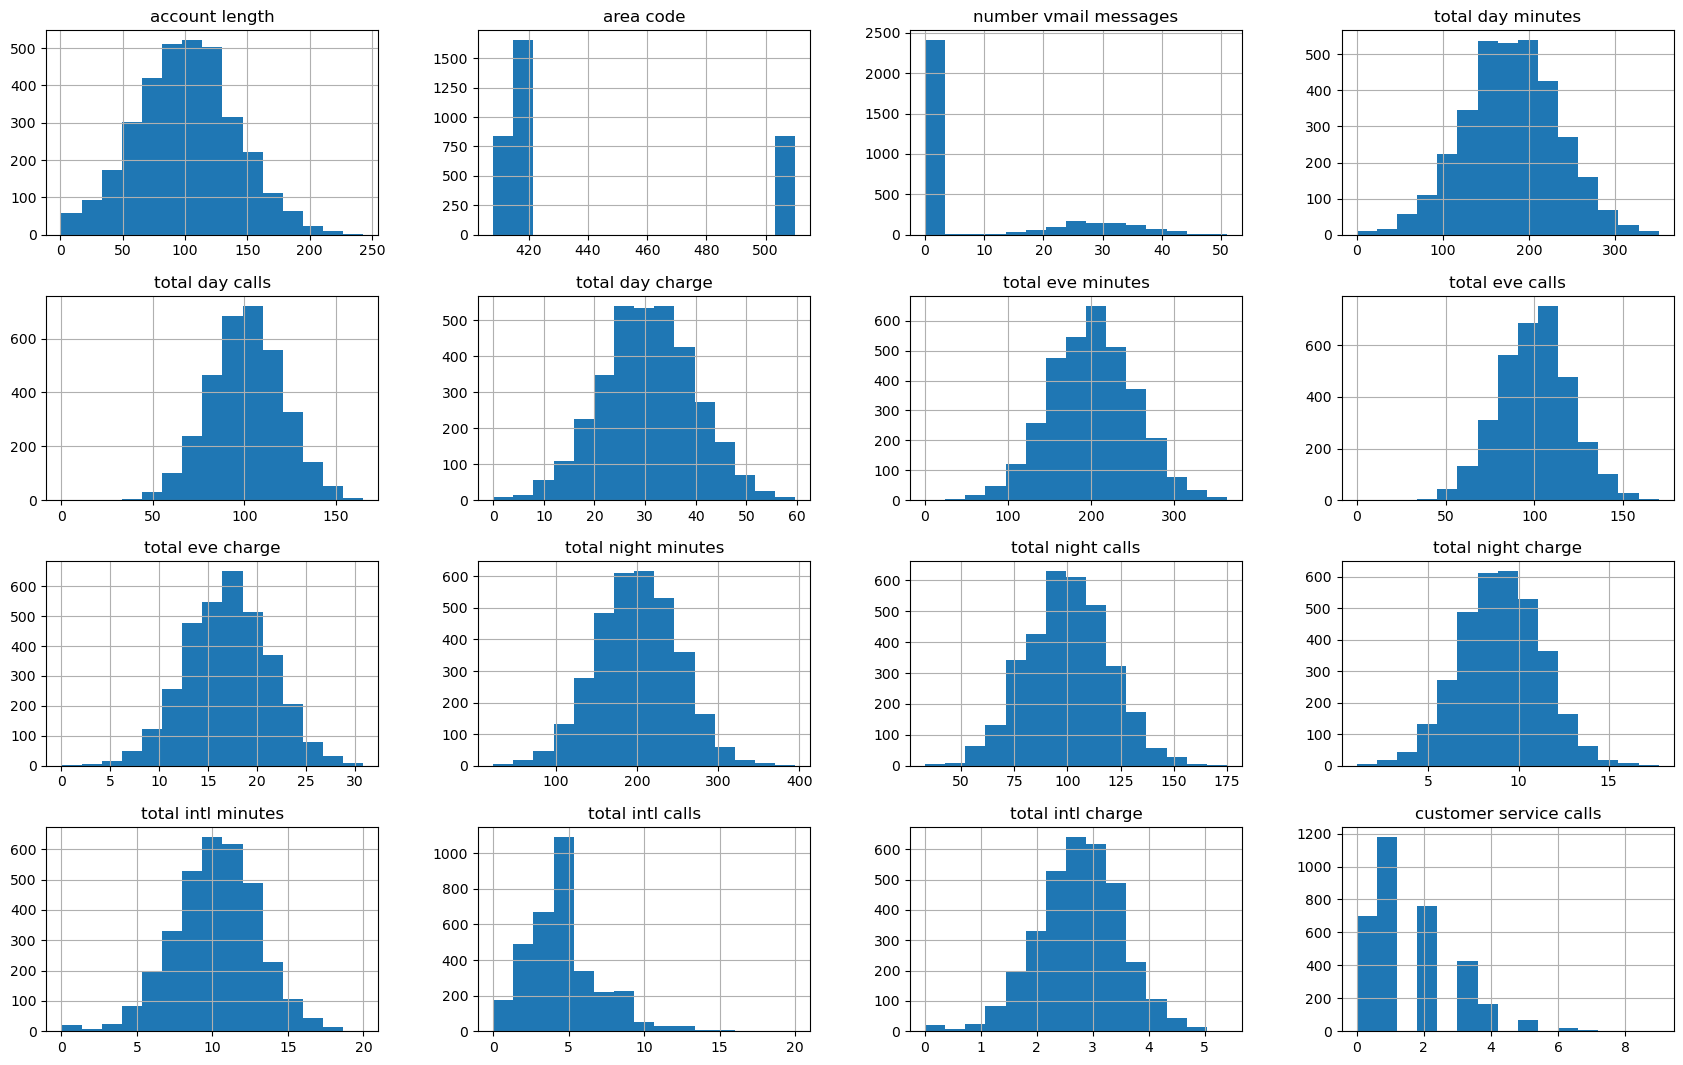

In [7]:
df.hist(bins=15, figsize=(21,13));

### Observation 
- Most of the columns folow a normal distribution 
- Columns such as `number vmail messages`, `total intl calls`, and `customer service call` do not assume normal distribution

### Target column class distribution 


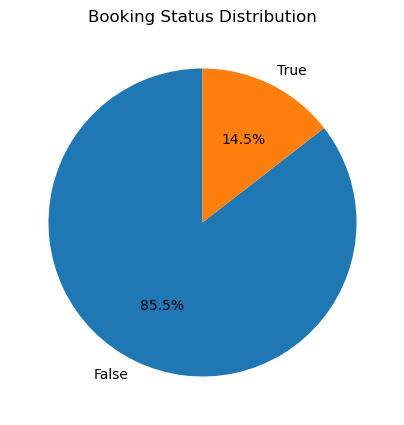

In [8]:
# Count target class distribution
target_class = df['churn'].value_counts().reset_index()
target_class.columns = ['churn', 'count']  

# Plot pie chart
plt.figure(figsize=(5, 5))  # Set figure size
plt.pie(
    target_class['count'], 
    labels=target_class['churn'], 
    autopct='%1.1f%%', 
    startangle=90, 
    
)

# Title
plt.title('Booking Status Distribution')

# Show the plot
plt.show()


### Observations
- There is definitely a case of class imbalance in our dataset

# Feature engineering 

### Total Minutes, calls and charges

In [9]:
# Total minutes 
df["total_minutes"] = df["total day minutes"] + df["total eve minutes"] + df["total night minutes"] + df["total intl minutes"]

# Total calls 
df["total_calls"] = df["total day calls"] + df["total eve calls"] + df["total night calls"] + df["total intl calls"]

# Total Charges
df["total_charge"] = df["total day charge"] + df["total eve charge"] + df["total night charge"] + df["total intl charge"]


df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_minutes,total_calls,total_charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,717.2,303,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,625.2,332,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,539.4,333,62.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,564.8,255,66.80
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,512.0,359,52.09


### Call-to-Minutes Ratio
- Identifies users who make many short calls vs. fewer long calls.

In [10]:
#df["calls_per_minute"] = df["total_calls"] / (df["total_minutes"] + 1)
df["calls_per_minute"] = np.where(df["total_minutes"] == 0, 0, df["total_calls"] / (df["total_minutes"] + 1))


## Activity Index

In [11]:
# Compute total activity score (combining calls & minutes)
df["activity_score"] = df["total_minutes"] + df["total_calls"]

# Define percentiles
low_threshold = df["activity_score"].quantile(0.25)   # 25th percentile
high_threshold = df["activity_score"].quantile(0.75)  # 75th percentile

# Assign activity index
df["activity_index"] = 1  # medium activity
df.loc[df["activity_score"] <= low_threshold, "activity_index"] = 0  # Low activity
df.loc[df["activity_score"] >= high_threshold, "activity_index"] = 2  # High activity


In [12]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_minutes,total_calls,total_charge,calls_per_minute,activity_score,activity_index
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,717.2,303,75.56,0.421888,1020.2,2
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,625.2,332,59.24,0.530182,957.2,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,539.4,333,62.29,0.616210,872.4,1
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,564.8,255,66.80,0.450689,819.8,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,512.0,359,52.09,0.699805,871.0,1


In [13]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,total_minutes,total_calls,total_charge,calls_per_minute,activity_score,activity_index
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,591.864776,305.137114,59.449754,0.527342,897.001890,0.999700
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,89.954251,34.448164,10.502261,0.104827,96.908535,0.707743
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,284.300000,191.000000,22.930000,0.276524,533.500000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,531.500000,282.000000,52.380000,0.454738,832.500000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,593.600000,305.000000,59.470000,0.514551,896.500000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,652.400000,328.000000,66.480000,0.585420,961.800000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,885.000000,416.000000,96.150000,1.247809,1204.800000,2.000000


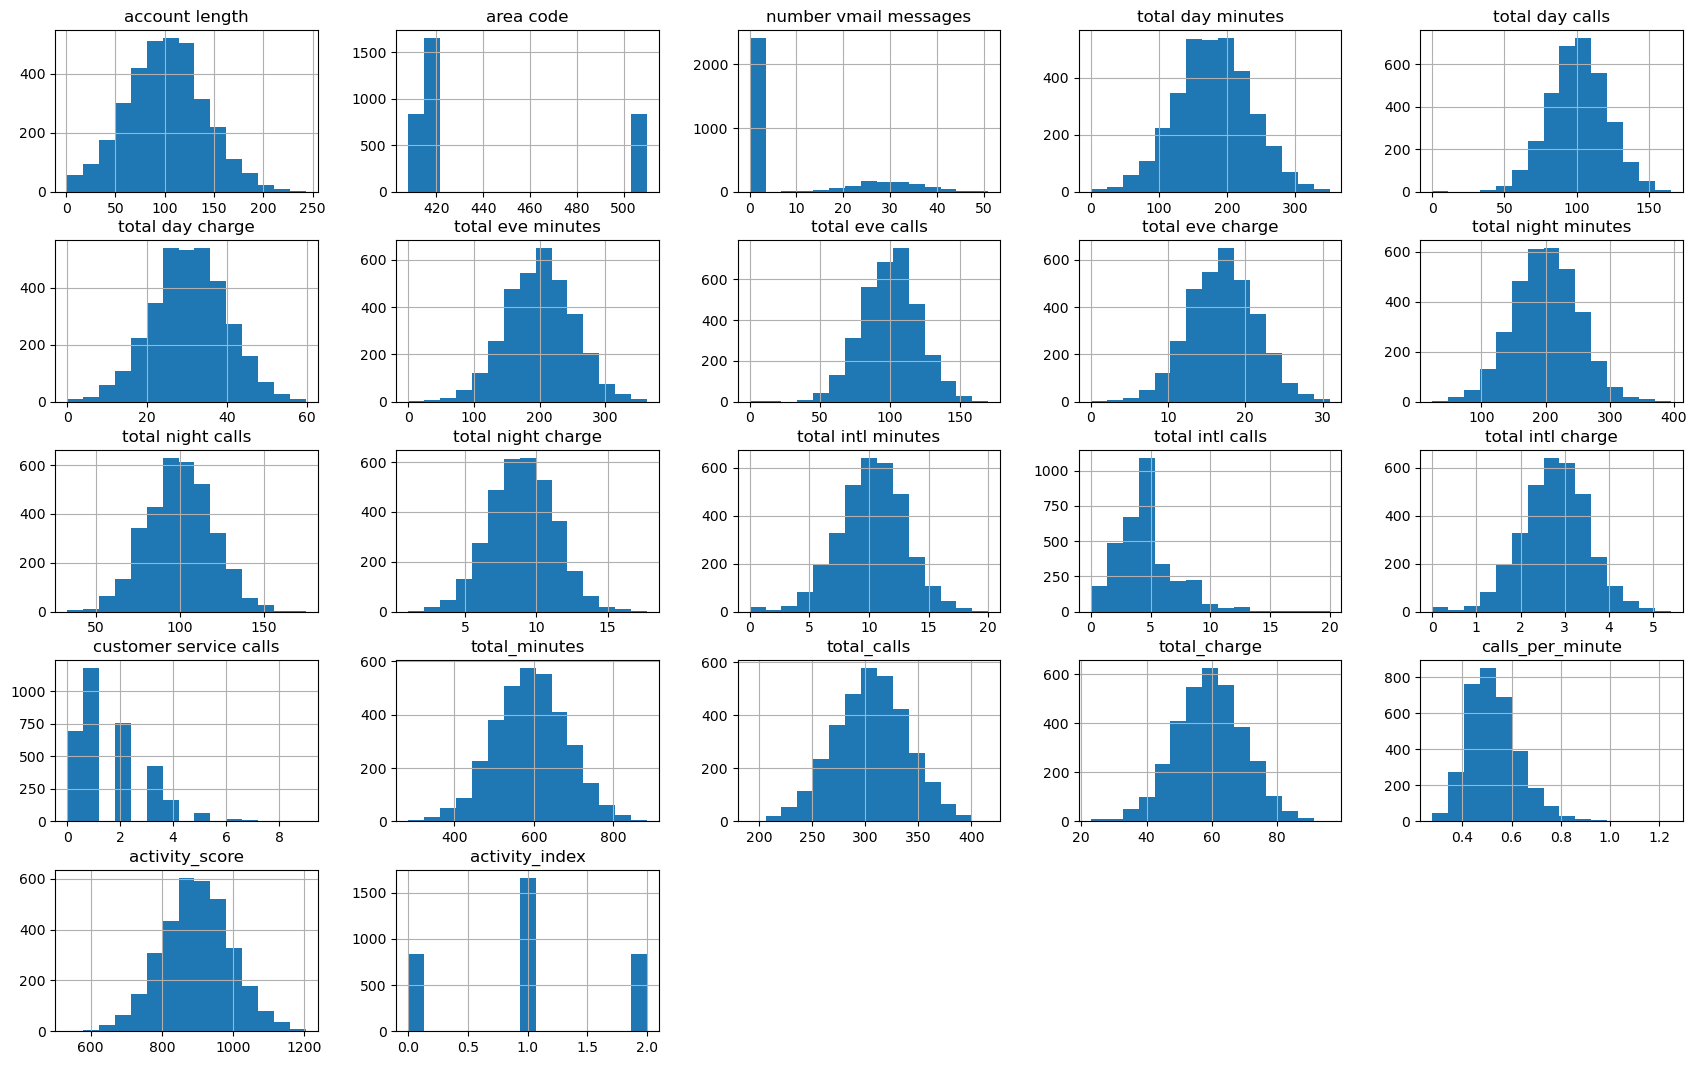

In [14]:
df.hist(bins=15, figsize=(21,13));

## Behavioral patterns 

### International Call Intensity
- Helps identify frequent international callers who might be sensitive to price changes.



In [15]:
# df["intl_call_ratio"] = df["total intl calls"] / (df["total_calls"] + 1)
# df["intl_minutes_ratio"] = df["total intl minutes"] / (df["total_minutes"] + 1)

df["intl_call_ratio"] = np.where(df["total_calls"] == 0, 0, df["total intl calls"] / (df["total_calls"] + 1))
df["intl_minutes_ratio"] = np.where(df["total_minutes"] == 0, 0, df["total intl minutes"] / (df["total_minutes"] + 1))

### Customer Service Call Intensity
- Customers who call customer service a lot may be more likely to churn.


In [16]:
# df["customer_service_call_ratio"] = df["customer service calls"] / (df["total_calls"] + 1)
df["customer_service_call_ratio"] = np.where(df["total_calls"] == 0, 0, df["customer service calls"] / (df["total_calls"] + 1))

## Voicemail Usage Indicator
- Customers with a voicemail plan who don’t use it might be more likely to churn.

### International Plan & High Intl Usage
- 1 = The customer has used voicemail at least once
- 0 = The customer has never used voicemail

In [17]:
df["vmail_usage_flag"] = (df["number vmail messages"] > 0).astype(int)


In [18]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_minutes,total_calls,total_charge,calls_per_minute,activity_score,activity_index,intl_call_ratio,intl_minutes_ratio,customer_service_call_ratio,vmail_usage_flag
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,717.2,303,75.56,0.421888,1020.2,2,0.009868,0.013924,0.003289,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,625.2,332,59.24,0.530182,957.2,1,0.009009,0.021878,0.003003,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,539.4,333,62.29,0.616210,872.4,1,0.014970,0.022576,0.000000,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,564.8,255,66.80,0.450689,819.8,0,0.027344,0.011665,0.007812,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,512.0,359,52.09,0.699805,871.0,1,0.008333,0.019688,0.008333,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        3333 non-null   object 
 1   account length               3333 non-null   int64  
 2   area code                    3333 non-null   int64  
 3   phone number                 3333 non-null   object 
 4   international plan           3333 non-null   object 
 5   voice mail plan              3333 non-null   object 
 6   number vmail messages        3333 non-null   int64  
 7   total day minutes            3333 non-null   float64
 8   total day calls              3333 non-null   int64  
 9   total day charge             3333 non-null   float64
 10  total eve minutes            3333 non-null   float64
 11  total eve calls              3333 non-null   int64  
 12  total eve charge             3333 non-null   float64
 13  total night minute

In [20]:
## Drop columns 
df = df.drop(columns=["area code",  'total day minutes', "total day calls", 'total day charge',
                      'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes',
                     'total night calls', 'total night charge' ], errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        3333 non-null   object 
 1   account length               3333 non-null   int64  
 2   phone number                 3333 non-null   object 
 3   international plan           3333 non-null   object 
 4   voice mail plan              3333 non-null   object 
 5   number vmail messages        3333 non-null   int64  
 6   total intl minutes           3333 non-null   float64
 7   total intl calls             3333 non-null   int64  
 8   total intl charge            3333 non-null   float64
 9   customer service calls       3333 non-null   int64  
 10  churn                        3333 non-null   bool   
 11  total_minutes                3333 non-null   float64
 12  total_calls                  3333 non-null   int64  
 13  total_charge      

<Axes: xlabel='state', ylabel='count'>

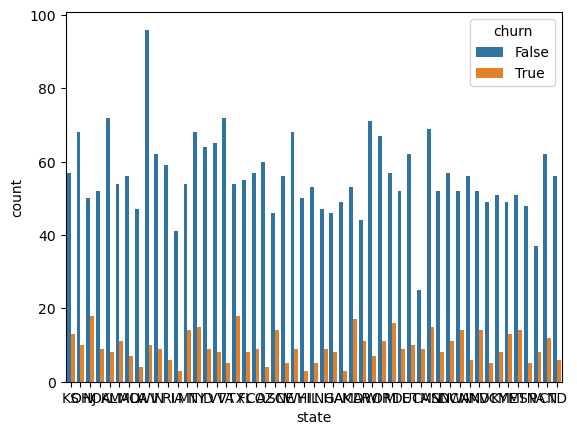

In [21]:
import seaborn as sns
sns.countplot(x='state', hue='churn', data=df)


<Axes: xlabel='international plan', ylabel='count'>

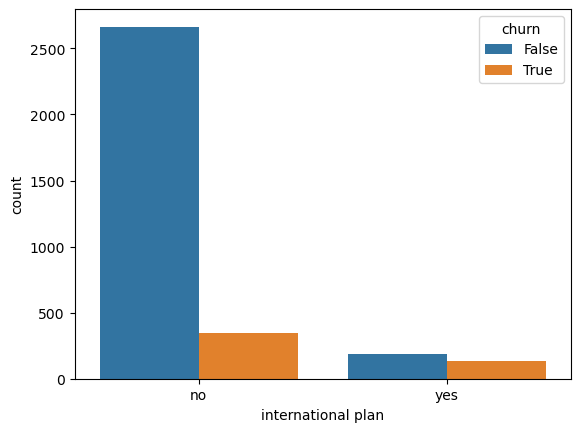

In [22]:
sns.countplot(x='international plan', hue='churn', data=df)

<Axes: xlabel='voice mail plan', ylabel='count'>

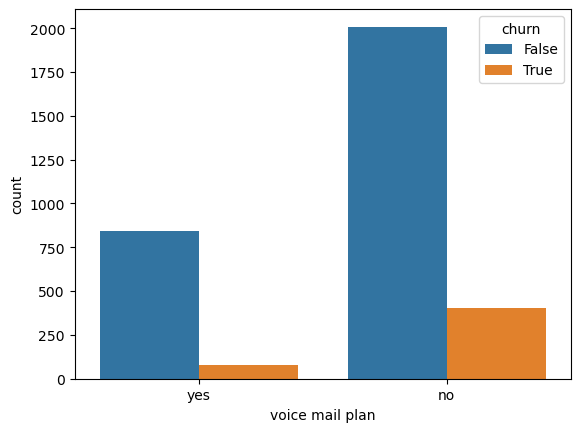

In [23]:
sns.countplot(x='voice mail plan', hue='churn', data=df)

<Axes: title={'center': 'Churn Proportion by State'}, xlabel='state'>

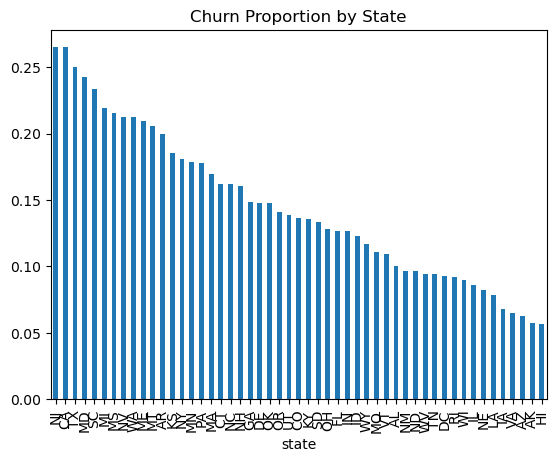

In [24]:
# Proportions of churn for categorical features
state_churn = df.groupby('state')['churn'].mean().sort_values(ascending=False)
state_churn.plot(kind='bar', title='Churn Proportion by State')


In [25]:
# Calculate churn rate by state
state_churn_rate = df.groupby('state')['churn'].mean().sort_values(ascending=False)
state_churn_rate = state_churn_rate * 100  # Convert to percentage
print(state_churn_rate)



state
NJ    26.470588
CA    26.470588
TX    25.000000
MD    24.285714
SC    23.333333
MI    21.917808
MS    21.538462
NV    21.212121
WA    21.212121
ME    20.967742
MT    20.588235
AR    20.000000
KS    18.571429
NY    18.072289
MN    17.857143
PA    17.777778
MA    16.923077
CT    16.216216
NC    16.176471
NH    16.071429
GA    14.814815
DE    14.754098
OK    14.754098
OR    14.102564
UT    13.888889
CO    13.636364
KY    13.559322
SD    13.333333
OH    12.820513
FL    12.698413
IN    12.676056
ID    12.328767
WY    11.688312
MO    11.111111
VT    10.958904
AL    10.000000
NM     9.677419
ND     9.677419
WV     9.433962
TN     9.433962
DC     9.259259
RI     9.230769
WI     8.974359
IL     8.620690
NE     8.196721
LA     7.843137
IA     6.818182
VA     6.493506
AZ     6.250000
AK     5.769231
HI     5.660377
Name: churn, dtype: float64


In [26]:
# Churn rate by international plan
intl_plan_churn_rate = df.groupby('international plan')['churn'].mean().sort_values(ascending=False) * 100
print(intl_plan_churn_rate)

# Churn rate by voice mail plan
vmail_plan_churn_rate = df.groupby('voice mail plan')['churn'].mean().sort_values(ascending=False) * 100
print(vmail_plan_churn_rate)


international plan
yes    42.414861
no     11.495017
Name: churn, dtype: float64
voice mail plan
no     16.715056
yes     8.676790
Name: churn, dtype: float64


In [27]:
# Define a threshold for high-risk churn (e.g., 30%)
high_risk_threshold = 15

# Flag high-risk churn segments
df['high_risk_churn'] = df['state'].map(lambda x: 1 if state_churn_rate.get(x, 0) > high_risk_threshold else 0)


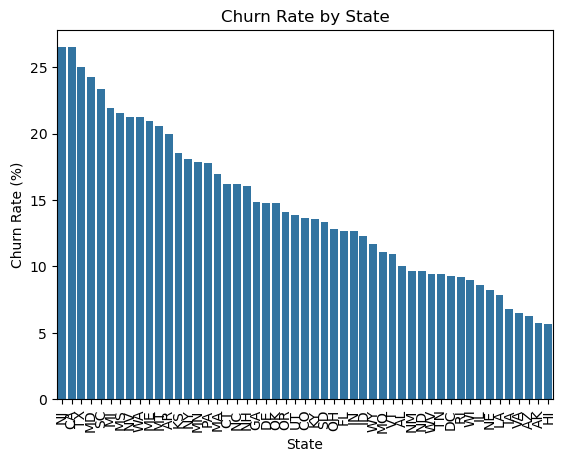

In [28]:
sns.barplot(x=state_churn_rate.index, y=state_churn_rate.values)
plt.title('Churn Rate by State')
plt.xlabel('State')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=90)
plt.show()


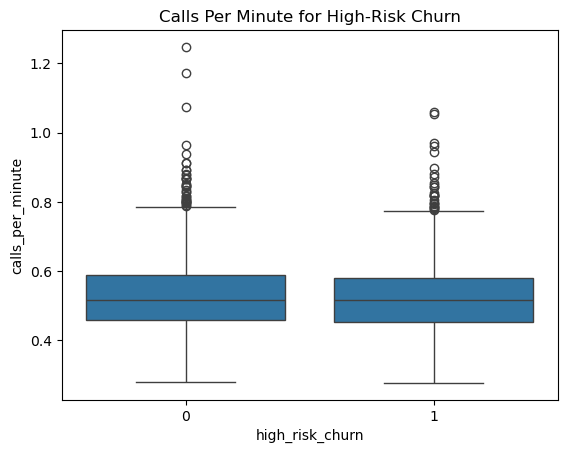

In [29]:
sns.boxplot(x='high_risk_churn', y='calls_per_minute', data=df)
plt.title('Calls Per Minute for High-Risk Churn')
plt.show()


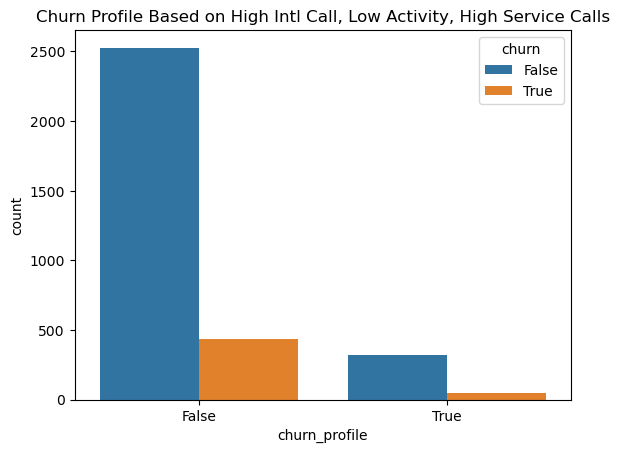

In [30]:
df['churn_profile'] = (df['intl_call_ratio'] > df['intl_call_ratio'].median()) & \
                       (df['activity_score'] <= df['activity_score'].median()) & \
                       (df['customer service calls'] > df['customer service calls'].median())

sns.countplot(x='churn_profile', hue='churn', data=df)
plt.title('Churn Profile Based on High Intl Call, Low Activity, High Service Calls')
plt.show()


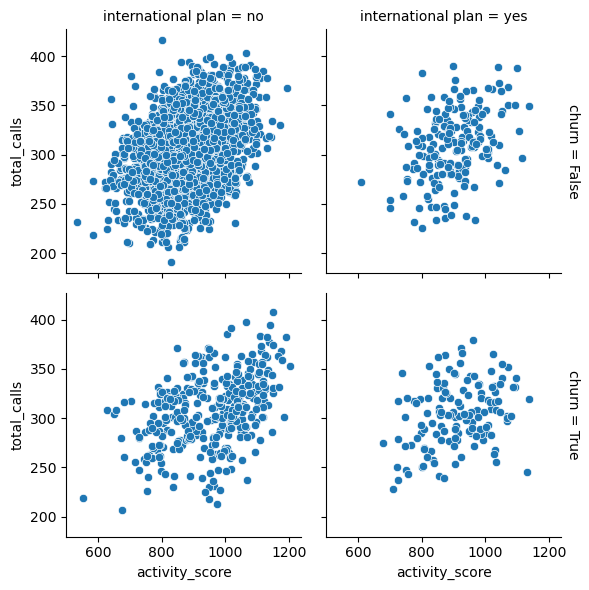

In [31]:
g = sns.FacetGrid(df, col="international plan", row="churn", margin_titles=True)
g.map(sns.scatterplot, "activity_score", "total_calls")


<Axes: xlabel='churn', ylabel='total_minutes'>

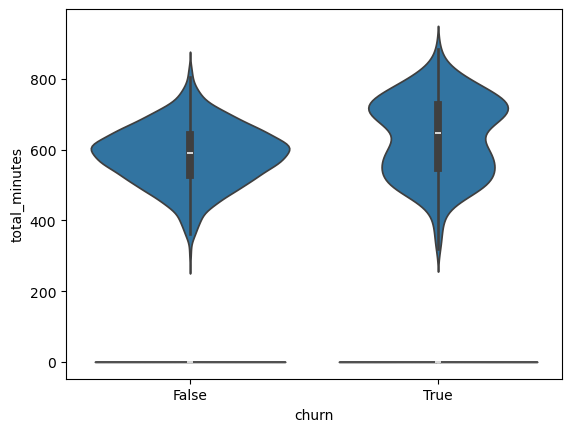

In [32]:
sns.violinplot(x='churn', y='total_minutes', data=df)
sns.violinplot(x='churn', y='calls_per_minute', data=df)


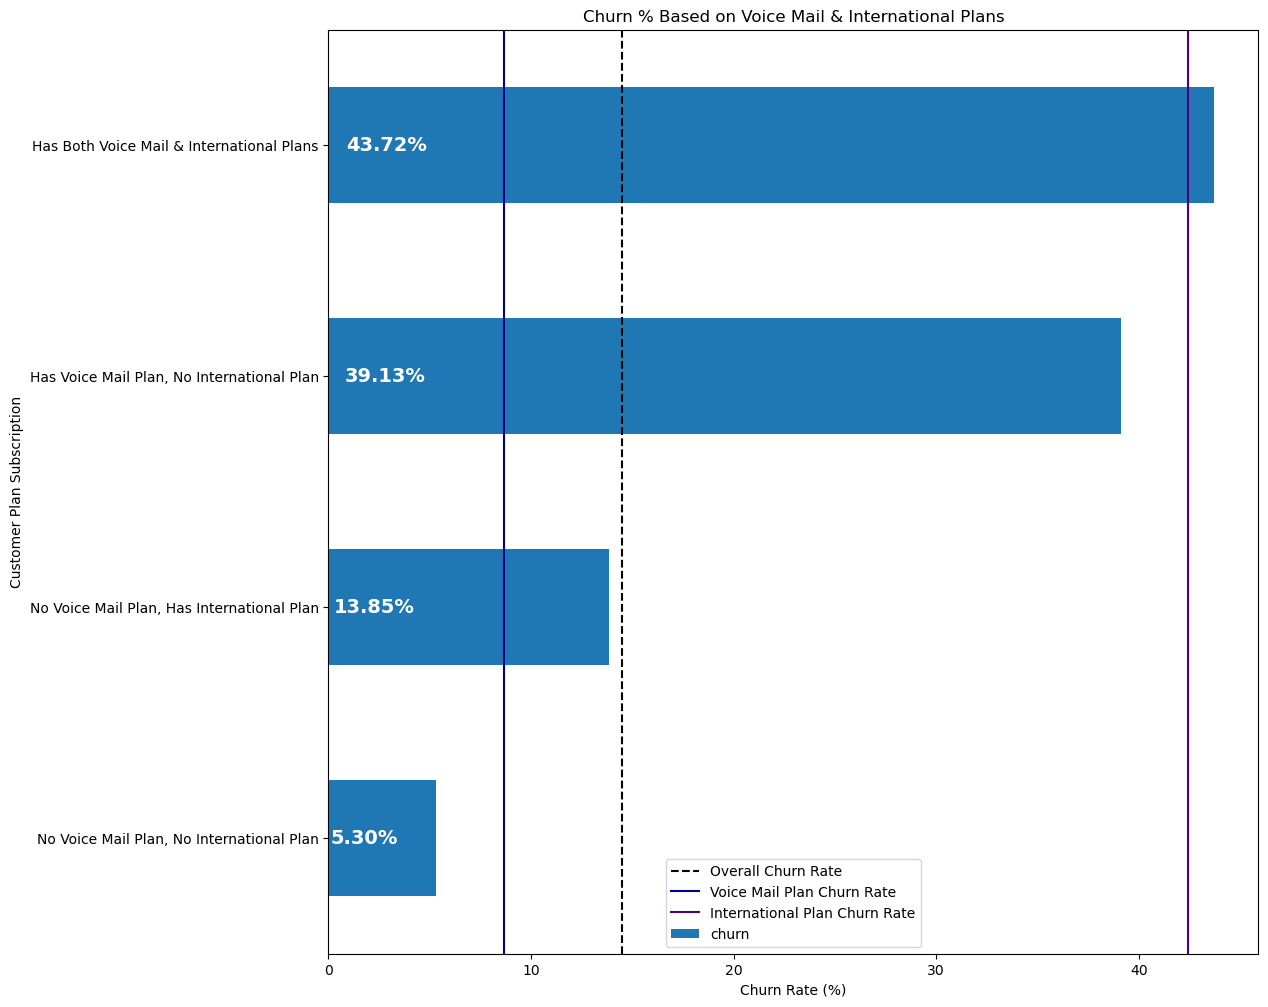

In [47]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Calculate churn percentages based on plan combinations
churn_by_plan = (df.groupby(['voice mail plan', 'international plan'])['churn'].mean() * 100)

# Sort values and plot as a horizontal bar chart
churn_by_plan.sort_values().plot(kind='barh', ax=ax, title='Churn % Based on Voice Mail & International Plans')

# Define more descriptive y-axis labels
labels = {
    ('no', 'no'): "No Voice Mail Plan, No International Plan",
    ('no', 'yes'): "No Voice Mail Plan, Has International Plan",
    ('yes', 'no'): "Has Voice Mail Plan, No International Plan",
    ('yes', 'yes'): "Has Both Voice Mail & International Plans"
}

ax.set_yticklabels([labels[idx] for idx in churn_by_plan.index])

# Add vertical reference lines for overall churn and per-plan churn rates
ax.axvline(x=df['churn'].mean() * 100, color='black', linestyle='dashed', label="Overall Churn Rate")
ax.axvline(x=df[df['voice mail plan'] == 'yes']['churn'].mean() * 100, color='darkblue', label="Voice Mail Plan Churn Rate")
ax.axvline(x=df[df['international plan'] == 'yes']['churn'].mean() * 100, color='indigo', label="International Plan Churn Rate")

# Annotate bars with churn percentage
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2f}%', 
                (p.get_x() + 0.02 * width, p.get_y() + p.get_height() / 2),
                color='white', weight='bold', size=14, va='center')

# Set axis labels
ax.set_xlabel('Churn Rate (%)')
ax.set_ylabel('Customer Plan Subscription')
ax.legend()

# Show the plot
plt.show()


account_length_category
Above 75th Percentile               0.142857
Below 25th Percentile               0.130909
Between 25th and 75th Percentile    0.152794
Name: churn, dtype: float64


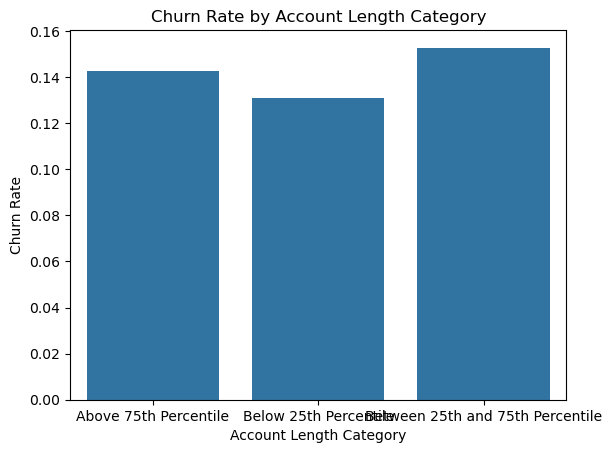

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentiles for account length
percentiles = np.percentile(df['account length'], [25, 75])

# Define the categories based on percentiles
def categorize_account_length(row):
    if row['account length'] < percentiles[0]:
        return 'Below 25th Percentile'
    elif row['account length'] > percentiles[1]:
        return 'Above 75th Percentile'
    else:
        return 'Between 25th and 75th Percentile'

# Apply categorization to account length
df['account_length_category'] = df.apply(categorize_account_length, axis=1)

# Calculate churn rate for each category
churn_rate_by_category = df.groupby('account_length_category')['churn'].mean()

# Display the churn rates
print(churn_rate_by_category)

# Optional: Visualize the churn rates by account length category
sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values)
plt.title('Churn Rate by Account Length Category')
plt.xlabel('Account Length Category')
plt.ylabel('Churn Rate')
plt.show()


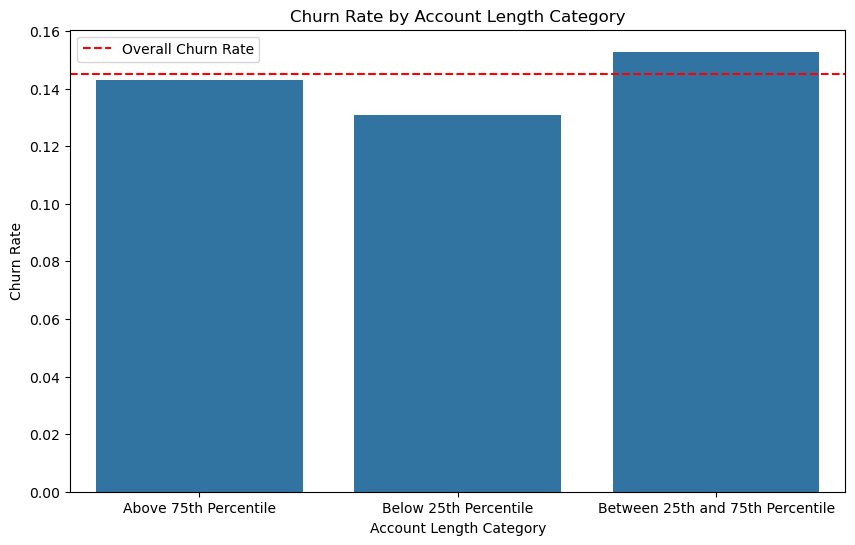

Overall Churn Rate: 0.14


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate overall churn rate
overall_churn_rate = df['churn'].mean()

# Calculate percentiles for account length
percentiles = np.percentile(df['account length'], [25, 75])

# Define the categories based on percentiles
def categorize_account_length(row):
    if row['account length'] < percentiles[0]:
        return 'Below 25th Percentile'
    elif row['account length'] > percentiles[1]:
        return 'Above 75th Percentile'
    else:
        return 'Between 25th and 75th Percentile'

# Apply categorization to account length
df['account_length_category'] = df.apply(categorize_account_length, axis=1)

# Calculate churn rate for each category (mean of churn for each group)
churn_rate_by_category = df.groupby('account_length_category')['churn'].mean()

# Plot churn rates by category with overall churn rate line
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values)
plt.axhline(y=overall_churn_rate, color='r', linestyle='--', label='Overall Churn Rate')  # Add horizontal line
plt.title('Churn Rate by Account Length Category')
plt.xlabel('Account Length Category')
plt.ylabel('Churn Rate')
plt.legend()
plt.show()

# Print overall churn rate for reference
print(f"Overall Churn Rate: {overall_churn_rate:.2f}")


In [60]:
account_length = df['account_length_category'].value_counts()
account_length

account_length_category
Between 25th and 75th Percentile    1682
Above 75th Percentile                826
Below 25th Percentile                825
Name: count, dtype: int64

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute percentiles for account length
p25 = np.percentile(df['account length'], 25)
p75 = np.percentile(df['account length'], 75)

# Categorize customers based on account length
def categorize_account_length(length):
    if length < p25:
        return "Short-term (< 25th percentile)"
    elif length >= p75:
        return "Long-term (> 75th percentile)"
    else:
        return "Mid-term (25th-75th percentile)"

df['account_length_category'] = df['account length'].apply(categorize_account_length)

df.head()

,state,account length,phone number,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_minutes,total_calls,total_charge,calls_per_minute,activity_score,activity_index,intl_call_ratio,intl_minutes_ratio,customer_service_call_ratio,vmail_usage_flag,high_risk_churn,churn_profile,account_length_category
0,KS,128,382-4657,no,yes,25,10.0,3,2.70,1,False,717.2,303,75.56,0.421888,1020.2,2,0.009868,0.013924,0.003289,1,1,False,Long-term (> 75th percentile)
1,OH,107,371-7191,no,yes,26,13.7,3,3.70,1,False,625.2,332,59.24,0.530182,957.2,1,0.009009,0.021878,0.003003,1,0,False,Mid-term (25th-75th percentile)
2,NJ,137,358-1921,no,no,0,12.2,5,3.29,0,False,539.4,333,62.29,0.616210,872.4,1,0.014970,0.022576,0.000000,0,1,False,Long-term (> 75th percentile)
3,OH,84,375-9999,yes,no,0,6.6,7,1.78,2,False,564.8,255,66.80,0.450689,819.8,0,0.027344,0.011665,0.007812,0,0,True,Mid-term (25th-75th percentile)
4,OK,75,330-6626,yes,no,0,10.1,3,2.73,3,False,512.0,359,52.09,0.699805,871.0,1,0.008333,0.019688,0.008333,0,0,False,Mid-term (25th-75th percentile)


In [ ]:
# Debug: Check category counts
print(df['account_length_category'].value_counts())

# Calculate churn rate per category
churn_rate = df.groupby('account_length_category')['churn'].mean() * 100

# Print calculated churn rates for verification
print(churn_rate)
# Ensure all categories appear in the correct order
category_order = ["Short-term (< 25th percentile)", "Mid-term (25th-75th percentile)", "Long-term (> 75th percentile)"]
churn_rate = churn_rate.reindex(category_order)  # Reindex ensures mid-term is included

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
churn_rate.plot(kind='bar', color=['blue', 'orange', 'green'], ax=ax)

# Add percentage labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width()/2, p.get_height() + 1),
                ha='center', fontsize=12, fontweight='bold', color='black')

# Improve readability
ax.set_title('Churn Rate by Account Length Percentile Group', fontsize=14)
ax.set_xlabel('Account Length Group')
ax.set_ylabel('Churn Rate (%)')
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [48]:
pivot = df.pivot_table(index='state', aggfunc='mean')
df.head()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
fig, ax = plt.subplots()
df.groupby('churn')['customer service calls'].mean().plot(kind='bar', ax=ax, label='')
ax.axhline(y=df['customer service calls'].mean(),c='indigo', label='dataset mean')
ax.legend()
ax.set_title('mean customer service calls depending on churn')
ax.set_ylabel('customer service calls (mean)', rotation = 90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    ax.annotate('{:.2f}'.format(height), (p.get_x()+.35*width, p.get_y()+.5*height), color = 'white', weight = 'bold', size = 14)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(30, 15))
sns.barplot(x=df['churn']*100, y=df['state'], order=pivot.sort_values('churn', ascending=False).index, ax=ax[0], palette='Blues_d', errcolor='crimson')
ax[0].set_xlabel('churn, %')
ax[0].set_title('churn precentage by state')



In [ ]:

sns.barplot(x=df['international plan']*100, y=df['state'], order=pivot.sort_values('international plan', ascending=False).index, ax=ax[1], palette='Blues_d', errcolor='crimson')
ax[1].set_xlabel('international plan, %')
ax[1].set_title('international plan precentage by state')

## Statistical Tests to determine feature correlation with target variable

### Independent t-test for normal distribution features 

In [34]:
from scipy.stats import ttest_ind

# List of normally distributed numerical columns
num_cols = df.select_dtypes(include = "number")

# Conduct independent t-test for normally distributed features
print("T-test Results:")
for col in num_cols:
    churned = df[df['churn'] == True][col]
    non_churned = df[df['churn'] == False][col]
    
    stat, p_value = ttest_ind(churned, non_churned, equal_var=False)  # Welch’s t-test
    print(f"{col}: p-value = {p_value:.4f} {'(Significant)' if p_value < 0.05 else '(Not Significant)'}")



T-test Results:
account length: p-value = 0.3365 (Not Significant)
number vmail messages: p-value = 0.0000 (Significant)
total intl minutes: p-value = 0.0001 (Significant)
total intl calls: p-value = 0.0032 (Significant)
total intl charge: p-value = 0.0001 (Significant)
customer service calls: p-value = 0.0000 (Significant)
total_minutes: p-value = 0.0000 (Significant)
total_calls: p-value = 0.3709 (Not Significant)
total_charge: p-value = 0.0000 (Significant)
calls_per_minute: p-value = 0.0000 (Significant)
activity_score: p-value = 0.0000 (Significant)
activity_index: p-value = 0.0000 (Significant)
intl_call_ratio: p-value = 0.0010 (Significant)
intl_minutes_ratio: p-value = 0.2023 (Not Significant)
customer_service_call_ratio: p-value = 0.0000 (Significant)
vmail_usage_flag: p-value = 0.0000 (Significant)
high_risk_churn: p-value = 0.0000 (Significant)


### Mann-Whitney test for features asymmetric distribution features 

In [35]:
from scipy.stats import mannwhitneyu

# List of non-normal columns
non_normal_cols = ["number vmail messages", "total intl calls", "customer service calls"]

# Conduct Mann-Whitney U test for non-normal features
print("\nMann-Whitney U Test Results:")
for col in non_normal_cols:
    churned = df[df['churn'] == True][col]
    non_churned = df[df['churn'] == False][col]
    
    stat, p_value = mannwhitneyu(churned, non_churned, alternative='two-sided')
    print(f"{col}: p-value = {p_value:.4f} {'(Significant)' if p_value < 0.05 else '(Not Significant)'}")



Mann-Whitney U Test Results:
number vmail messages: p-value = 0.0000 (Significant)
total intl calls: p-value = 0.0000 (Significant)
customer service calls: p-value = 0.0000 (Significant)


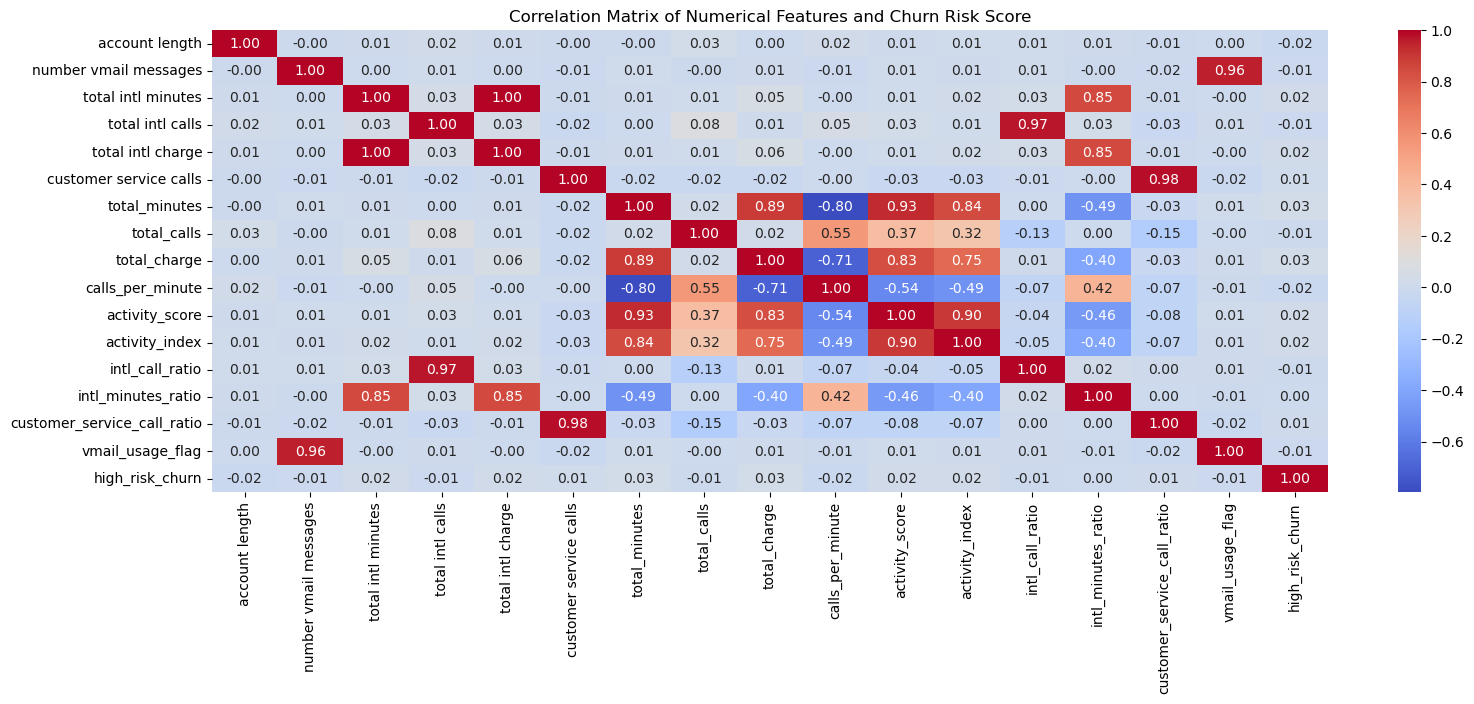

In [40]:
import seaborn as sns

numerical_features = df.select_dtypes(include=['number']).columns
corr_data = df[numerical_features].corr() #+ ['churn_risk_score']].corr()

plt.figure(figsize=(18, 6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Churn Risk Score')
plt.show()


In [ ]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        3333 non-null   object 
 1   account length               3333 non-null   int64  
 2   phone number                 3333 non-null   object 
 3   international plan           3333 non-null   object 
 4   voice mail plan              3333 non-null   object 
 5   number vmail messages        3333 non-null   int64  
 6   total intl minutes           3333 non-null   float64
 7   total intl calls             3333 non-null   int64  
 8   total intl charge            3333 non-null   float64
 9   customer service calls       3333 non-null   int64  
 10  churn                        3333 non-null   bool   
 11  total_minutes                3333 non-null   float64
 12  total_calls                  3333 non-null   int64  
 13  total_charge      

/tmp/ipykernel_67274/67613240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='total_minutes', data=df, palette='Set2')


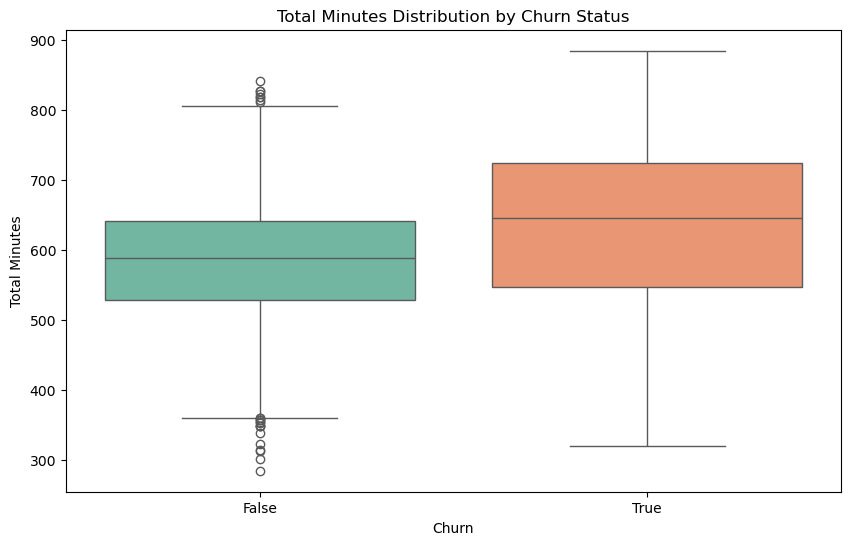

In [41]:
# Boxplot comparing total_minutes for churned vs non-churned customers
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total_minutes', data=df, palette='Set2')
plt.title('Total Minutes Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Minutes')
plt.show()
